# 4_动能指标策略
*用动能指标交易*

## 目录

- 什么是动能指标?
- MOM/MACD/RSI/Stochastic是怎么计算的?
- 如何用图像展示动能指标？
- 如何用动能指标做策略?

## 什么是动能指标?
动能指标对价格的计算与物理学中对速度的计算相似，需要知道价格移动的距离、时间、移动的速度与加速度，这些变化都反映着市场价格在不同维度上的变化。动能指标的类型主要有两种，一种是Momentum 指标，它有中间轴，可以是0或100，上下没有界限；另一种是Oscillator 振荡器，它的取值在0至100之间。

## MOM/MACD/RSI/Stochastic是怎么计算的?

---

### 1. Momentum

$ROCR100=(Rrice_t/prevPrice_{t-10})*100$

---

### 2. MACD
$MACD = 12'day 'EMA - 26'day'EMA$

$MACD'signal=9'day 'EMA(MACD)$

$Hist = MACD - MACD' signal$

---

### 3. RSI

$RSI=100-\frac{100}{1+RS}$

$RS=\frac{\text{average of net UP closing changes for selected period of days}}{\text{average of net DOWN closing changes for selected period of days}}$

---

### 4. Stochastic
$Fast'K=\frac{C_t-L_n}{H_n-L_n}$

$Slow'K=MA(Fast'K,3)$

$Slow'D=MA(Slow'K,3)$

## 如何用图像展示动能指标？

In [1]:
import pandas as pd
import warnings
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
data = pd.Panel({s: pd.read_excel('three.xlsx', sheetname=s, index_col='datetime') 
                   for s in ['BTCUSDT.binance', 'EOSUSDT.binance', 'ETHUSDT.binance']})
# data = pd.read_excel('threesymbol.xlsx', sheetname='BTCUSDT.binance', index_col='datetime')

In [2]:
import talib as ta
ROCR100 = pd.DataFrame({item: ta.ROCR100(value.values) for item, value in data.minor_xs('close').iteritems()}, 
             index = data.minor_xs('close').index)

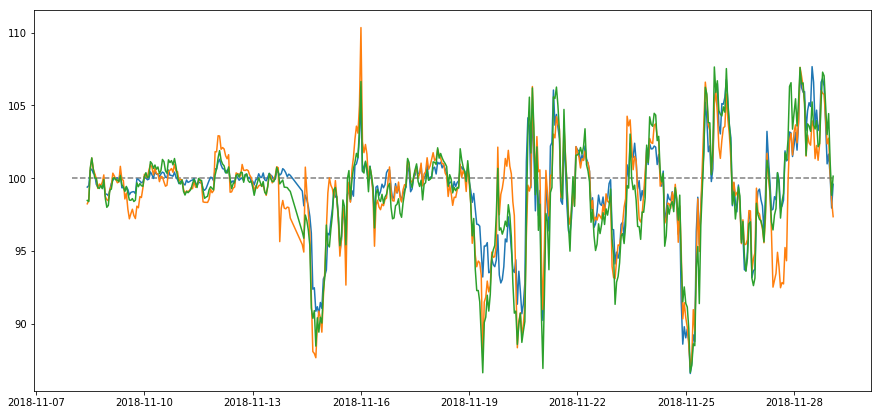

In [3]:
fig = plt.figure(figsize=(15, 7))
plt.hlines(100,ROCR100.index[0],ROCR100.index[-1] , linestyles='dashed', alpha=0.5)
plt.plot(ROCR100)
plt.show()

In [4]:
import pandas as pd
import warnings
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib as ta
warnings.filterwarnings('ignore')
data = pd.read_excel('three.xlsx', sheetname='BTCUSDT.binance', index_col='datetime')

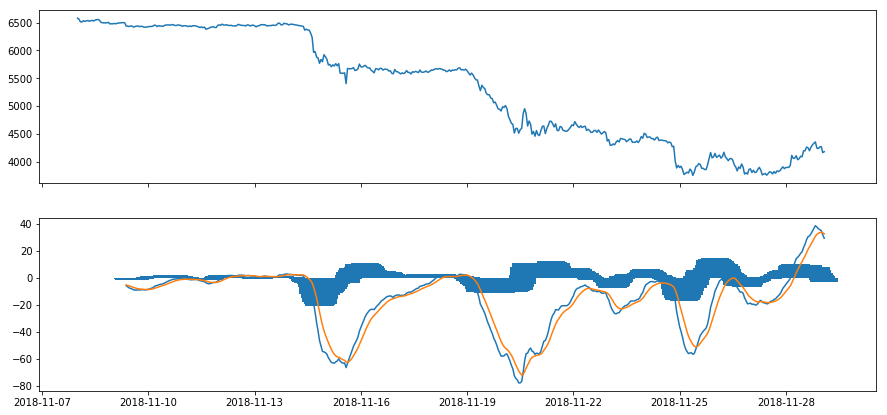

In [5]:
#MACD
from talib import abstract
close = pd.Series(np.array(data.close.values, dtype='float64'), index=data.index)
macd = abstract.MACD(data, 20,price='close')


# macd
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(macd.index, data['close'])
ax1.plot(macd.index, macd['macd'])
ax1.plot(macd.index, macd['macdsignal'])
ax1.bar(macd.index, macd['macdhist'])
plt.show()

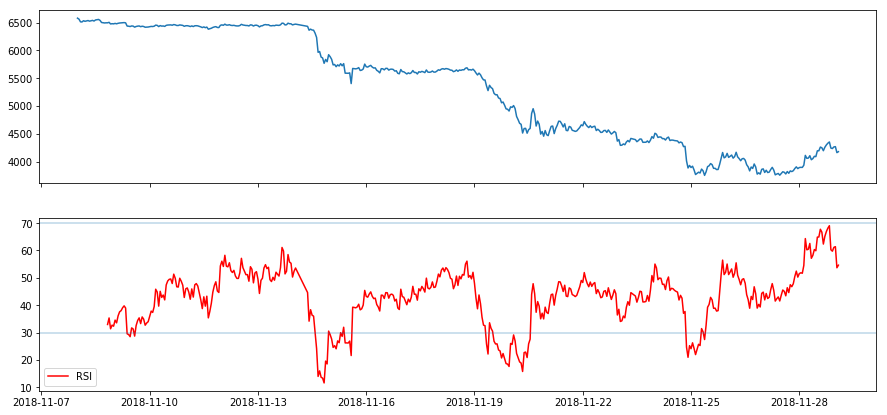

In [6]:
#RSI
RSI = ta.abstract.RSI(data,20, price='close')

fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(data['close'])
ax1.plot(RSI,'r', label='RSI')
ax1.axhline(70,alpha=0.3)
ax1.axhline(30,alpha=0.3)
plt.legend()
plt.show()

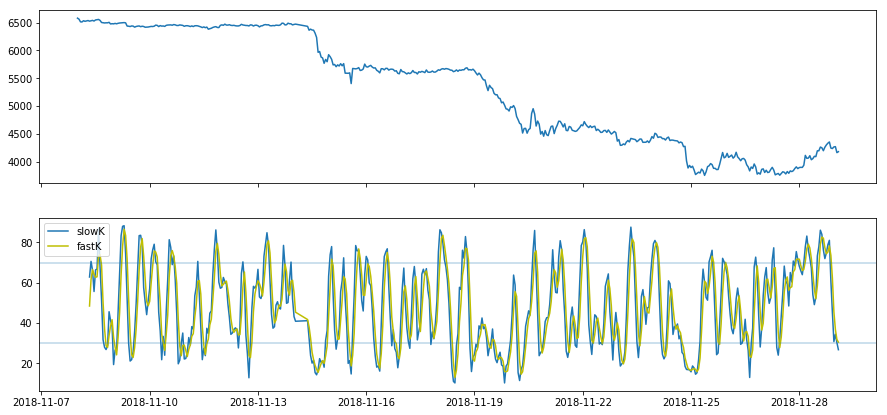

In [7]:
#Stochastic
k,d = ta.STOCH(data.high.values,data.low.values,data.close.values, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
KDJ = pd.concat([pd.Series(k,index=data.index), pd.Series(d,index=data.index)], axis=1, keys=['slowk','slowd'])

fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(data['close'])
ax1.plot(KDJ['slowk'], label='slowK')
ax1.plot(KDJ['slowd'],'y', label='fastK')
ax1.axhline(70,alpha=0.3)
ax1.axhline(30,alpha=0.3)
plt.legend(loc='upper left')
plt.show()

## 如何用动能指标做策略?

**1. 图表的领先形态（Charting Patterns-Leading ahead）:**
可以通过观察指标对价格做领先的形态或走势判断。

**2. 交叉信号（Cross Signals）：**
快线高于慢线金叉，看涨；快线低于慢线死叉，看跌。

**3. 柱的斜率（The slope of MACD-Histogram）：**
当前的柱比前一根高，看涨；当前的柱比前一根低，看跌。

**4. 超买超卖（Overbought/OverSold）：**
当振荡器高于上方的值如RSI(70)为超买，低于下方的值如RSI(30)为超卖，超卖买入，超买卖出。

**5. 背离（Divergence）：**
价格创新高，而指标没有创新高，顶背离，看跌。
价格创新低，而指标没有创新低，底背离，看涨。


## RSI判断超买超卖方法: 
**底背离买入：**
RSI< 30

**顶背离卖出：**
RSI>70

In [ ]:
# RSI
    # 策略参数
    RSIPeriod = 20
    lots = 1
    stopRatio = 0.08  # 止损比例

    # 策略变量
    rsignal = {} 
    transactionPrice = {}
    #设置变量
    self.setArrayManagerSize(self.RSIPeriod * 4)
    self.rsignal = {s: 0 for s in self.symbolList}
    self.transactionPrice = {s: 0 for s in self.symbolList}
    

        # 持有多头仓位
        if self.posDict[symbol + "_LONG"] > 0:
            if (bar.close < self.transactionPrice[symbol] * (1 - self.stopRatio)) or \
                    (bar.close > self.transactionPrice[symbol] * (1 + 2 * self.stopRatio)):
                self.sell(symbol, bar.close * 0.98, self.posDict[symbol + "_LONG"])

        # 持有空头仓位
        elif self.posDict[symbol + "_SHORT"] > 0:
            if (bar.close > self.transactionPrice[symbol] * (1 + self.stopRatio)) or \
                    (bar.close < self.transactionPrice[symbol] * (1 - 2 * self.stopRatio)):
                self.cover(symbol, bar.close * 1.02, self.posDict[symbol + "_SHORT"])


       # 计算信号

        rsi = ta.RSI(am3.close, self.RSIPeriod)

        if rsi[-1] > 70:
            self.rsignal[symbol] = -1
        elif rsi[-1] < 30:
            self.rsignal[symbol] = 1
        else:
            self.rsignal[symbol] = 0

        if self.posDict[symbol + "_LONG"] == 0 and self.posDict[symbol + "_SHORT"] == 0:
            if self.rsignal[symbol] == 1:
                self.buy(symbol, bar.close * 1.02, self.lots)
            if self.rsignal[symbol] == -1:
                self.short(symbol, bar.close * 0.98, self.lots)

## 作业
根据RSI背离策略例子，写出其他的动能策略